## Supervised Learning Lab

### 1. Evolution of Machine Learning

Machine Learning (ML) has evolved significantly over the past decades:

- **1950s–1960s**: Foundations of AI; perceptron algorithms.
- **1970s–1980s**: Symbolic AI and rule-based systems.
- **1990s**: Rise of statistical learning; support vector machines.
- **2000s**: Ensemble methods (Random Forest, Boosting).
- **2010s–present**: Deep learning breakthroughs; big data era.
ML now encompasses various approaches where we teach machines to learn patterns from data.

### 2. Taxonomy of Machine Learning Approaches

Supervised learning is one umbrella under which multiple algorithms reside. Other major approaches:

| Approach            | Definition                                                    | Techniques (examples)                     |
|---------------------|---------------------------------------------------------------|-------------------------------------------|
| **Supervised**      | Learn from labeled data to predict outcomes.                  | Regression, Classification (e.g., LR, RF) |
| **Unsupervised**    | Discover structure in unlabeled data.                         | Clustering (K-Means), Dim. Reduction (PCA) |
| **Reinforcement**   | Learn via trial-and-error and rewards.                        | Q-Learning, Policy Gradients             |
| **Semi-supervised** | Combine small labeled with large unlabeled datasets.          | Self-training, Co-training               |

### 3. Applications Across ML Approaches

In [1]:
applications = {
    'Supervised': ['Email spam detection', 'Credit scoring', 'Medical diagnosis'],
    'Unsupervised': ['Customer segmentation', 'Anomaly detection'],
    'Reinforcement': ['Game playing (AlphaGo)', 'Robotics'],
    'Semi-supervised': ['Web page classification', 'Speech recognition'],
}
for approach, apps in applications.items():
    print(f"{approach}: {', '.join(apps)}")

Supervised: Email spam detection, Credit scoring, Medical diagnosis
Unsupervised: Customer segmentation, Anomaly detection
Reinforcement: Game playing (AlphaGo), Robotics
Semi-supervised: Web page classification, Speech recognition


### 4. What is Supervised Learning?

**Definition**: Train models on input–output pairs to learn a mapping from features (X) to target (y).

**Workflow**:
1. Problem definition
2. Data collection & cleaning
3. Feature engineering
4. Model training
5. Evaluation
6. Tuning & deployment

**Key Terms**: Features, Target, Training/Test sets, Overfitting, Underfitting, Hyperparameters.

**Common Python Libraries**: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.

## 5. Popular Supervised Models & Use Cases

| Model                | Type           | Use Case                           |
|----------------------|----------------|------------------------------------|
| Linear Regression    | Regression     | House price prediction             |
| Logistic Regression  | Classification | Titanic survival, spam detection   |
| Decision Trees       | Both           | Customer churn                     |
| Random Forest        | Both           | Tabular data classification/regression |
| K-Nearest Neighbors  | Both           | Image recognition (small datasets) |
| Support Vector Machine | Both         | Text classification                |

- **Regression Problems**:
  - Target variable is continuous (e.g., predicting house prices, temperatures).
  - Common metrics: Mean Squared Error (MSE), Root MSE (RMSE), R² score

- **Classification Problems**:
  - Target variable is categorical (e.g., survived/deceased, spam/not spam).
  - Common metrics: Accuracy, Precision, Recall, F1-Score, AUC.

### 6. Titanic Survival Prediction: Define the Problem

- **Objective**: Predict `Survived` (0 or 1) for each passenger.
- **Data**: Mix of numeric and categorical features; ~891 rows.

### 7. Logistic Regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# y = mx + c
# y = wx + b

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# preprocessing data
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[features].copy()
y = df['Survived']
X = pd.get_dummies(X, columns=['Sex','Embarked'], drop_first=True)

In [6]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB


In [8]:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
# Split
def train_eval(model):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

# X_train & y_train - data to use in training the logistic regression model
# X_test & y_test - data to use for testing the trained model
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"{model.__class__.__name__} -> Acc: {accuracy_score(y_test,y_pred):.3f}, AUC: {roc_auc_score(y_test,y_proba):.3f}")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.show()

Logistic Regression Results
LogisticRegression -> Acc: 0.804, AUC: 0.844
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



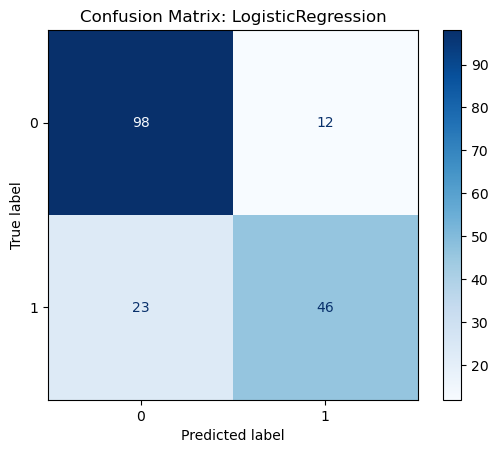

In [17]:
# Train & evaluate
print("Logistic Regression Results")
train_eval(LogisticRegression(max_iter=1000))

### 8. Model 2: Random Forest


Random Forest Results
RandomForestClassifier -> Acc: 0.804, AUC: 0.844
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



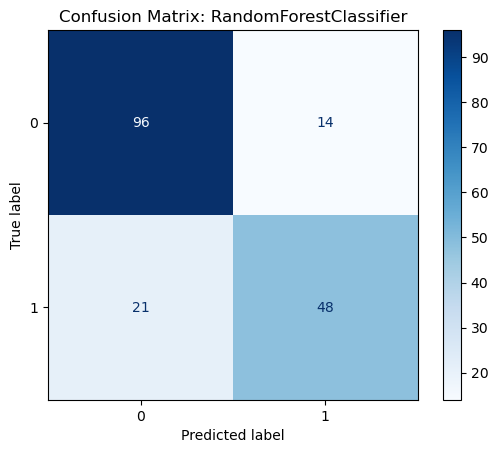

In [19]:
from sklearn.ensemble import RandomForestClassifier

print("\nRandom Forest Results")
train_eval(RandomForestClassifier(n_estimators=50, random_state=42))

### 9. Model Choice Rationale and Comparison

- **Logistic Regression**: Interpretable, fast, good baseline.
- **Random Forest**: Captures nonlinearities and interactions.

### 10. Evaluation Metrics for Classification Models

#### A. Confusion Matrix

A table of prediction outcomes:
- **TP (True Positive)**: Correctly predicted positive.
- **FP (False Positive)**: Incorrectly predicted positive.
- **TN (True Negative)**: Correctly predicted negative.
- **FN (False Negative)**: Incorrectly predicted negative.

#### B. Precision

- **Formula**: TP / (TP + FP)
- **When to use**: When false positives are costly.  
  e.g., Fraud detection: minimize falsely flagging legitimate transactions.

#### C. Recall

- **Formula**: TP / (TP + FN)
- **When to use**: When false negatives are costly.  
  e.g., Disease screening: avoid missing actual cases.

#### D. F1-Score

- **Formula**: 2 * (Precision * Recall) / (Precision + Recall)
- **When to use**: Balance between precision and recall; useful for imbalanced classes.

#### E. Accuracy

- **Formula**: (TP + TN) / (TP + TN + FP + FN)
- **When to use**: When class distribution is balanced and all errors are equally important.
  
- **Caution**: Can be misleading with imbalanced data.

#### F. AUC (Area Under ROC Curve)

- Measures model’s ability to distinguish classes across thresholds.
- **When to use**: Compare models regardless of classification threshold, especially under imbalance.